In [1]:
import sqlite3
import pandas as pd 

* Conexion sql

In [2]:
#conexion con sqlite3
conn = sqlite3.connect('oblicaciones.db')
cur = conn.cursor()

In [3]:
cur.execute('SELECT name FROM sqlite_master WHERE type = "table";')
tables = cur.fetchall()

for table in tables:
    print(table[0])

tasas_productos
Obligaciones_clientes
productos_obligaciones


In [4]:
cur.execute('SELECT * FROM productos_obligaciones;')
productos_obligaciones = pd.DataFrame(cur.fetchall(), columns=cur.description)

In [5]:
#cargamos df de oblicaiones y tasas 
data = pd.read_csv('productos_obligaciones.csv')
obligacion_productos= pd.DataFrame(data)
obligacion_productos.head(3)

C:\Users\user\AppData\Local\Temp\ipykernel_7704\923857793.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('productos_obligaciones.csv')


,radicado,num_documento,cod_segm_tasa,cod_subsegm_tasa,cal_interna_tasa,id_producto,tipo_id_producto,valor_inicial,fecha_desembolso,plazo,...,modalidad,tipo_plazo,cod_segmento,tasa_cartera,tasa_operacion_especifica,tasa_hipotecario,tasa_leasing,tasa_sufi,tasa_factoring,tasa_tarjeta
0,1.442762e+10,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000,31/01/2023,60,...,Nuevo,LP,5,"0,161128356","0,165235435","0,096167143","0,09111694","0,088588","0,15133551","0,3867"
1,1.442762e+10,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000,31/01/2023,60,...,Nuevo,LP,5,"0,164155784","0,171568599","0,121946","0,108922219","0,08889","0,14416484","0,3867"
2,1.442762e+10,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000,31/01/2023,60,...,Nuevo,LP,5,"0,165266283","0,176710994","0,168905714","0,114379117","0,072232","0,135216254","0,3867"


In [6]:
obligacion_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130165 entries, 0 to 130164
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   radicado                   130165 non-null  float64
 1   num_documento              130165 non-null  int64  
 2   cod_segm_tasa              130165 non-null  int64  
 3   cod_subsegm_tasa           130165 non-null  int64  
 4   cal_interna_tasa           130165 non-null  object 
 5   id_producto                130165 non-null  object 
 6   tipo_id_producto           130165 non-null  object 
 7   valor_inicial              130165 non-null  object 
 8   fecha_desembolso           130165 non-null  object 
 9   plazo                      130165 non-null  object 
 10  cod_periodicidad           130165 non-null  int64  
 11  periodicidad               130165 non-null  object 
 12  saldo_deuda                130165 non-null  object 
 13  modalidad                  13

In [7]:
#funcion para el calculo de las tasas efectivas 

def calcular_tasa_efectiva(tasa_nominal, periodicidad):
    tasa_nominal = float(tasa_nominal.replace(',', '.'))
    if periodicidad == 'MENSUAL':
        return ((((1 + tasa_nominal) ** 12) - 1)*12)/12
    elif periodicidad == 'BIMENSUAL':
        return ((((1 + tasa_nominal) ** 6) - 1)*6)/6
    elif periodicidad == 'TRIMESTRAL':
        return ((((1 + tasa_nominal) ** 4) - 1)*4)/4
    elif periodicidad == 'SEMESTRAL':
        return ((((1 + tasa_nominal) ** 2) - 1)*2)/2
    elif periodicidad == 'ANUAL':
        return ((((1 + tasa_nominal) ** 1) - 1)*1)/1
    else:
        return None

* Tomar la tasa efectiva, multiplicarla por el valor_inicial y dejar este resultado como 
valor_final, el resultado de esta tabla debe quedar almacenado; ya que este nos 
servirá como un insumo de la parte 2. 

In [8]:
for columna in ['tasa_cartera', 'tasa_operacion_especifica', 'tasa_hipotecario',
       'tasa_leasing', 'tasa_sufi', 'tasa_factoring', 'tasa_tarjeta']:
    for i, periodicidad in enumerate(obligacion_productos['periodicidad']):
        tasa_nominal = obligacion_productos[columna].iloc[i]
        obligacion_productos.at[i, f'{columna}_efectiva'] = calcular_tasa_efectiva(tasa_nominal, periodicidad)


In [9]:
obligacion_productos.to_csv('obligaciones_productos_efectivo.csv')

In [10]:
#nuevo conjunto con tasas efectivas 
tasas_efectivas = obligacion_productos 

In [11]:
tasas_efectivas.dtypes

radicado                              float64
num_documento                           int64
cod_segm_tasa                           int64
cod_subsegm_tasa                        int64
cal_interna_tasa                       object
id_producto                            object
tipo_id_producto                       object
valor_inicial                          object
fecha_desembolso                       object
plazo                                  object
cod_periodicidad                        int64
periodicidad                           object
saldo_deuda                            object
modalidad                              object
tipo_plazo                             object
cod_segmento                            int64
tasa_cartera                           object
tasa_operacion_especifica              object
tasa_hipotecario                       object
tasa_leasing                           object
tasa_sufi                              object
tasa_factoring                    

* sumar el valor_final de todas las obligaciones por cliente y dejar 
únicamente las que tenga un valor superior a … el resultado de esta tabla debe 
quedar almacenado; ya que este nos servirá como un insumo de la parte 3.2

In [12]:
#cambio de tipo de variable 
tasas_efectivas['valor_inicial'] = tasas_efectivas['valor_inicial'].str.replace(',', '.')
tasas_efectivas['valor_inicial'] = tasas_efectivas['valor_inicial'].astype(float)


In [13]:
#calculo del valor_final
tasas_efectivas["valor_final"] = tasas_efectivas["valor_inicial"] * tasas_efectivas[["tasa_cartera_efectiva", "tasa_operacion_especifica_efectiva", "tasa_hipotecario_efectiva", "tasa_leasing_efectiva", "tasa_sufi_efectiva", "tasa_factoring_efectiva", "tasa_tarjeta_efectiva"]].sum(axis=1).astype(int)
tasas_efectivas

,radicado,num_documento,cod_segm_tasa,cod_subsegm_tasa,cal_interna_tasa,id_producto,tipo_id_producto,valor_inicial,fecha_desembolso,plazo,...,tasa_factoring,tasa_tarjeta,tasa_cartera_efectiva,tasa_operacion_especifica_efectiva,tasa_hipotecario_efectiva,tasa_leasing_efectiva,tasa_sufi_efectiva,tasa_factoring_efectiva,tasa_tarjeta_efectiva,valor_final
0,1.442762e+10,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000.0,31/01/2023,60,...,"0,15133551","0,3867",5.005688,5.265622,2.009687,1.847447,1.769252,4.425288,49.558035,72450000.0
1,1.442762e+10,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000.0,31/01/2023,60,...,"0,14416484","0,3867",5.196311,5.686713,2.977988,2.457905,1.778485,4.033420,49.558035,74550000.0
2,1.442762e+10,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000.0,31/01/2023,60,...,"0,135216254","0,3867",5.267613,6.047543,5.506595,2.667715,1.309219,3.580820,49.558035,76650000.0
3,1.442762e+10,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000.0,31/01/2023,60,...,"0,159783125","0,3867",5.420850,5.583757,3.118667,2.185660,1.796389,4.922723,49.558035,75600000.0
4,1.442762e+10,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000.0,31/01/2023,60,...,"0,161572796","0,3867",5.663202,6.278165,2.302463,2.824273,1.502324,5.033331,49.558035,76650000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130160,1.442762e+10,1080188275,5,3,C1,RLP - cartera,cod_plan - producto,56100.0,4/05/2020,36,...,"0,131555419","0,3867",20.215793,16.103715,1.811426,3.797280,5.348491,3.406664,49.558035,5610000.0
130161,1.442762e+10,1080188275,5,3,C1,RLP - cartera,cod_plan - producto,56100.0,4/05/2020,36,...,"0,147991998","0,3867",25.555139,6.945155,5.080820,2.439227,2.102328,4.239216,49.558035,5329500.0
130162,1.442762e+10,1080188275,5,3,C1,RLP - cartera,cod_plan - producto,56100.0,4/05/2020,36,...,"0,147991998","0,3867",25.902755,10.771327,4.978445,2.439227,1.096698,4.239216,49.558035,5497800.0
130163,1.442762e+10,1080188275,5,3,C1,RLP - cartera,cod_plan - producto,56100.0,4/05/2020,36,...,"0,137713097","0,3867",26.339209,12.616362,5.739134,3.825634,2.944252,3.703196,49.558035,5834400.0


In [14]:
valor_final = tasas_efectivas[['num_documento','valor_final']]
valor_final

,num_documento,valor_final
0,1081648945,72450000.0
1,1081648945,74550000.0
2,1081648945,76650000.0
3,1081648945,75600000.0
4,1081648945,76650000.0
...,...,...
130160,1080188275,5610000.0
130161,1080188275,5329500.0
130162,1080188275,5497800.0
130163,1080188275,5834400.0


In [27]:
#dejar solo un registro por num de documento 

valor_final_f = valor_final.groupby("num_documento").agg({"valor_final": "sum"})
valor_final_f = valor_final_f.reset_index()
#dividimos toda la columna por un valor para que sea mas sencilla manipularla 
valor_final_f['valor_final'] = valor_final_f['valor_final'] / 1000000
valor_final_f

,num_documento,valor_final
0,3907738,440.765664
1,4234923,3218.833800
2,4894508,205.254000
3,4935132,5717.211145
4,7061608,5359.477848
...,...,...
298,1339938146,1083.936600
299,1342616595,1786.804488
300,1344463827,3567.510000
301,1346212202,2864.101051


In [29]:
#Establecemos el filtro, según el valor que consideremos en este caso 250 
valor_final_f = valor_final_f[valor_final_f['valor_final'] >= 250]
valor_final_f

,num_documento,valor_final
0,3907738,440.765664
1,4234923,3218.833800
3,4935132,5717.211145
4,7061608,5359.477848
5,7099543,3987.792000
...,...,...
298,1339938146,1083.936600
299,1342616595,1786.804488
300,1344463827,3567.510000
301,1346212202,2864.101051


In [ ]:
#se elimina la columna valor final del dataset grande 
tasas_efectivas = tasas_efectivas.drop('valor_final', axis=1)

# Python parte 1

In [62]:
#unimos los df por medio del numero de docuemnto
df_union = pd.merge(tasas_efectivas, valor_final_f, on='num_documento')
df_union.head(3)

,radicado,num_documento,cod_segm_tasa,cod_subsegm_tasa,cal_interna_tasa,id_producto,tipo_id_producto,valor_inicial,fecha_desembolso,plazo,...,tasa_factoring,tasa_tarjeta,tasa_cartera_efectiva,tasa_operacion_especifica_efectiva,tasa_hipotecario_efectiva,tasa_leasing_efectiva,tasa_sufi_efectiva,tasa_factoring_efectiva,tasa_tarjeta_efectiva,valor_final
0,1.442762e+10,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000.0,31/01/2023,60,...,"0,15133551","0,3867",5.005688,5.265622,2.009687,1.847447,1.769252,4.425288,49.558035,6841.8
1,1.442762e+10,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000.0,31/01/2023,60,...,"0,14416484","0,3867",5.196311,5.686713,2.977988,2.457905,1.778485,4.033420,49.558035,6841.8
2,1.442762e+10,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000.0,31/01/2023,60,...,"0,135216254","0,3867",5.267613,6.047543,5.506595,2.667715,1.309219,3.580820,49.558035,6841.8


In [63]:
df_union.columns

Index(['radicado', 'num_documento', 'cod_segm_tasa', 'cod_subsegm_tasa',
       'cal_interna_tasa', 'id_producto', 'tipo_id_producto', 'valor_inicial',
       'fecha_desembolso', 'plazo', 'cod_periodicidad', 'periodicidad',
       'saldo_deuda', 'modalidad', 'tipo_plazo', 'cod_segmento',
       'tasa_cartera', 'tasa_operacion_especifica', 'tasa_hipotecario',
       'tasa_leasing', 'tasa_sufi', 'tasa_factoring', 'tasa_tarjeta',
       'tasa_cartera_efectiva', 'tasa_operacion_especifica_efectiva',
       'tasa_hipotecario_efectiva', 'tasa_leasing_efectiva',
       'tasa_sufi_efectiva', 'tasa_factoring_efectiva',
       'tasa_tarjeta_efectiva', 'valor_final'],
      dtype='object')

* Fusione ambos conjuntos de datos en función de las columnas relevantes

In [65]:
#seleccionamos variables de interes 
df_union = df_union[['num_documento', 'cod_segmento', 'cod_subsegm_tasa',
       'cal_interna_tasa', 'id_producto', 'valor_inicial', 'plazo', 'cod_periodicidad', 
       'saldo_deuda', 'modalidad', 'tipo_plazo', 
       'tasa_cartera_efectiva', 'tasa_operacion_especifica_efectiva',
       'tasa_hipotecario_efectiva', 'tasa_leasing_efectiva',
       'tasa_sufi_efectiva', 'tasa_factoring_efectiva',
       'tasa_tarjeta_efectiva', 'valor_final']]

* Limpie y preprocese los datos si es necesario (por ejemplo, maneje los valores 
perdidos, convierta los tipos de datos si es necesario)

In [66]:
#eliminamos valores nulos 
df_union = df_union.dropna(subset=['plazo'])
df_union

,num_documento,cod_segmento,cod_subsegm_tasa,cal_interna_tasa,id_producto,valor_inicial,plazo,cod_periodicidad,saldo_deuda,modalidad,tipo_plazo,tasa_cartera_efectiva,tasa_operacion_especifica_efectiva,tasa_hipotecario_efectiva,tasa_leasing_efectiva,tasa_sufi_efectiva,tasa_factoring_efectiva,tasa_tarjeta_efectiva,valor_final
0,1081648945,5,2,C4,OEL - operacion_especifica,1050000.000,60,1,1050000,Nuevo,LP,5.005688,5.265622,2.009687,1.847447,1.769252,4.425288,49.558035,6841.800000
1,1081648945,5,2,C4,OEL - operacion_especifica,1050000.000,60,1,1050000,Nuevo,LP,5.196311,5.686713,2.977988,2.457905,1.778485,4.033420,49.558035,6841.800000
2,1081648945,5,2,C4,OEL - operacion_especifica,1050000.000,60,1,1050000,Nuevo,LP,5.267613,6.047543,5.506595,2.667715,1.309219,3.580820,49.558035,6841.800000
3,1081648945,5,2,C4,OEL - operacion_especifica,1050000.000,60,1,1050000,Nuevo,LP,5.420850,5.583757,3.118667,2.185660,1.796389,4.922723,49.558035,6841.800000
4,1081648945,5,2,C4,OEL - operacion_especifica,1050000.000,60,1,1050000,Nuevo,LP,5.663202,6.278165,2.302463,2.824273,1.502324,5.033331,49.558035,6841.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128363,996105820,5,3,C3,OPE - operacion_especifica,110747.142,12,1,"9228,9285",Actual,LP,20.215793,16.103715,1.811426,3.797280,5.348491,3.406664,49.558035,721.628377
128364,996105820,5,3,C3,OPE - operacion_especifica,110747.142,12,1,"9228,9285",Actual,LP,25.555139,6.945155,5.080820,2.439227,2.102328,4.239216,49.558035,721.628377
128365,996105820,5,3,C3,OPE - operacion_especifica,110747.142,12,1,"9228,9285",Actual,LP,25.902755,10.771327,4.978445,2.439227,1.096698,4.239216,49.558035,721.628377
128366,996105820,5,3,C3,OPE - operacion_especifica,110747.142,12,1,"9228,9285",Actual,LP,26.339209,12.616362,5.739134,3.825634,2.944252,3.703196,49.558035,721.628377


In [88]:
import pandas as pd
df_union = pd.read_excel("./df_unio.xlsx")
df_union = df_union.drop(columns="Unnamed: 0", axis=1)

In [89]:
df_union.head()

,radicado,num_documento,cod_segm_tasa,cod_subsegm_tasa,cal_interna_tasa,id_producto,tipo_id_producto,valor_inicial,fecha_desembolso,plazo,...,tasa_factoring,tasa_tarjeta,tasa_cartera_efectiva,tasa_operacion_especifica_efectiva,tasa_hipotecario_efectiva,tasa_leasing_efectiva,tasa_sufi_efectiva,tasa_factoring_efectiva,tasa_tarjeta_efectiva,valor_final
0,14427616502,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000.0,31/01/2023,60,...,"0,15133551","0,3867",5.005688,5.265622,2.009687,1.847447,1.769252,4.425288,49.558035,6841.8
1,14427616502,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000.0,31/01/2023,60,...,"0,14416484","0,3867",5.196311,5.686713,2.977988,2.457905,1.778485,4.033420,49.558035,6841.8
2,14427616502,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000.0,31/01/2023,60,...,"0,135216254","0,3867",5.267613,6.047543,5.506595,2.667715,1.309219,3.580820,49.558035,6841.8
3,14427616502,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000.0,31/01/2023,60,...,"0,159783125","0,3867",5.420850,5.583757,3.118667,2.185660,1.796389,4.922723,49.558035,6841.8
4,14427616502,1081648945,5,2,C4,OEL - operacion_especifica,cod_plan - producto,1050000.0,31/01/2023,60,...,"0,161572796","0,3867",5.663202,6.278165,2.302463,2.824273,1.502324,5.033331,49.558035,6841.8


In [90]:
#variable binaria que se puede cambiar a una equivalencia numerica

df_union["modalidad"] = df_union["modalidad"].map({
    "Nuevo": 0,
    "Actual": 1
}).astype(int)

df_union["tipo_plazo"] = df_union["tipo_plazo"].map({
    "CP": 0,
    "LP": 1
}).astype(int) 

In [91]:
#cambio a num
df_union['plazo'] = pd.to_numeric(df_union['plazo'], errors='coerce')

In [92]:
df_union = df_union.dropna()
df_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127969 entries, 0 to 128367
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   radicado                            127969 non-null  int64  
 1   num_documento                       127969 non-null  int64  
 2   cod_segm_tasa                       127969 non-null  int64  
 3   cod_subsegm_tasa                    127969 non-null  int64  
 4   cal_interna_tasa                    127969 non-null  object 
 5   id_producto                         127969 non-null  object 
 6   tipo_id_producto                    127969 non-null  object 
 7   valor_inicial                       127969 non-null  float64
 8   fecha_desembolso                    127969 non-null  object 
 9   plazo                               127969 non-null  float64
 10  cod_periodicidad                    127969 non-null  int64  
 11  periodicidad              

In [93]:
#Preprocessing para el id_producto y la cal_interna_tasa
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_union['id_producto'].astype(str))
df_union['id_producto'] = le.transform(df_union['id_producto'].astype(str))

In [94]:
le.fit(df_union['cal_interna_tasa'].astype(str))
df_union['cal_interna_tasa'] = le.transform(df_union['cal_interna_tasa'].astype(str))

In [95]:
#Conversion de variable 
"""
mapeo_saldo_deuda = {
    '831,8685': 831,
    '120835,3333': 120835,
    '33334,623': 3334,
    '43968,7635': 43969,
    '750000': 75000,
    '28780,5': 28780
}
df_union["saldo_deuda"] = df_union["saldo_deuda"].map(mapeo_saldo_deuda)
df_union["saldo_deuda"] = df_union["saldo_deuda"].fillna(1).astype(int)
"""

'\nmapeo_saldo_deuda = {\n    \'831,8685\': 831,\n    \'120835,3333\': 120835,\n    \'33334,623\': 3334,\n    \'43968,7635\': 43969,\n    \'750000\': 75000,\n    \'28780,5\': 28780\n}\ndf_union["saldo_deuda"] = df_union["saldo_deuda"].map(mapeo_saldo_deuda)\ndf_union["saldo_deuda"] = df_union["saldo_deuda"].fillna(1).astype(int)\n'

In [96]:
# Conversión de variable
saldo_deuda = df_union["saldo_deuda"].copy()
lista_saldo_deuda = [num.replace(",", ".") for num in saldo_deuda]
lista_round = [int(float(num)) for num in lista_saldo_deuda]
df_union["saldo_deuda"] = lista_round

In [97]:
df_union["saldo_deuda"].unique()

array([1050000,   75288,   23331, ...,    3648,   88479,    9228],
      dtype=int64)

In [15]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127969 entries, 0 to 128367
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   radicado                            127969 non-null  int64  
 1   num_documento                       127969 non-null  int64  
 2   cod_segm_tasa                       127969 non-null  int64  
 3   cod_subsegm_tasa                    127969 non-null  int64  
 4   cal_interna_tasa                    127969 non-null  int32  
 5   id_producto                         127969 non-null  int32  
 6   tipo_id_producto                    127969 non-null  object 
 7   valor_inicial                       127969 non-null  float64
 8   fecha_desembolso                    127969 non-null  object 
 9   plazo                               127969 non-null  float64
 10  cod_periodicidad                    127969 non-null  int64  
 11  periodicidad              

*  Cree una función para calcular el monto total de la deuda para cada segmento de 
cliente.

In [98]:

def calcular_monto_total_deuda_por_segmento(df):
    # Convertir la columna 'saldo_deuda' a tipo numérico
    df['saldo_deuda'] = pd.to_numeric(df['saldo_deuda'], errors='coerce')

    # Agrupar por 'cod_segmento' y sumar los montos de deuda para cada grupo
    monto_total_deuda_por_segmento = df.groupby('cod_segmento')['saldo_deuda'].sum()

    return monto_total_deuda_por_segmento

# df es el DataFrame que contiene los datos
monto_total_deuda_por_segmento = calcular_monto_total_deuda_por_segmento(df_union)

# Agregar los resultados como una nueva columna en el DataFrame original
df_union['monto_total_deuda_por_segmento'] = df_union['cod_segmento'].map(monto_total_deuda_por_segmento)

# Mostrar el DataFrame con la nueva columna 'monto_total_deuda_por_segmento'
df_union

,radicado,num_documento,cod_segm_tasa,cod_subsegm_tasa,cal_interna_tasa,id_producto,tipo_id_producto,valor_inicial,fecha_desembolso,plazo,...,tasa_tarjeta,tasa_cartera_efectiva,tasa_operacion_especifica_efectiva,tasa_hipotecario_efectiva,tasa_leasing_efectiva,tasa_sufi_efectiva,tasa_factoring_efectiva,tasa_tarjeta_efectiva,valor_final,monto_total_deuda_por_segmento
0,14427616502,1081648945,5,2,12,773,cod_plan - producto,1050000.000,31/01/2023,60.0,...,"0,3867",5.005688,5.265622,2.009687,1.847447,1.769252,4.425288,49.558035,6841.800000,26559116408
1,14427616502,1081648945,5,2,12,773,cod_plan - producto,1050000.000,31/01/2023,60.0,...,"0,3867",5.196311,5.686713,2.977988,2.457905,1.778485,4.033420,49.558035,6841.800000,26559116408
2,14427616502,1081648945,5,2,12,773,cod_plan - producto,1050000.000,31/01/2023,60.0,...,"0,3867",5.267613,6.047543,5.506595,2.667715,1.309219,3.580820,49.558035,6841.800000,26559116408
3,14427616502,1081648945,5,2,12,773,cod_plan - producto,1050000.000,31/01/2023,60.0,...,"0,3867",5.420850,5.583757,3.118667,2.185660,1.796389,4.922723,49.558035,6841.800000,26559116408
4,14427616502,1081648945,5,2,12,773,cod_plan - producto,1050000.000,31/01/2023,60.0,...,"0,3867",5.663202,6.278165,2.302463,2.824273,1.502324,5.033331,49.558035,6841.800000,26559116408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128363,14427616066,996105820,5,3,11,774,cod_plan - producto,110747.142,10/02/2022,12.0,...,"0,3867",20.215793,16.103715,1.811426,3.797280,5.348491,3.406664,49.558035,721.628377,26559116408
128364,14427616066,996105820,5,3,11,774,cod_plan - producto,110747.142,10/02/2022,12.0,...,"0,3867",25.555139,6.945155,5.080820,2.439227,2.102328,4.239216,49.558035,721.628377,26559116408
128365,14427616066,996105820,5,3,11,774,cod_plan - producto,110747.142,10/02/2022,12.0,...,"0,3867",25.902755,10.771327,4.978445,2.439227,1.096698,4.239216,49.558035,721.628377,26559116408
128366,14427616066,996105820,5,3,11,774,cod_plan - producto,110747.142,10/02/2022,12.0,...,"0,3867",26.339209,12.616362,5.739134,3.825634,2.944252,3.703196,49.558035,721.628377,26559116408


In [99]:
df_union['monto_total_deuda_por_segmento'].unique()

array([26559116408,  1641329635,    51717449], dtype=int64)

In [100]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# K MEANS

Realice un análisis de agrupación (por ejemplo, k-means) en los clientes basado en su 
deuda y las tasas de interés de sus productos financieros

In [19]:
data_mapped = df_union.copy() 
data_mapped.columns

Index(['radicado', 'num_documento', 'cod_segm_tasa', 'cod_subsegm_tasa',
       'cal_interna_tasa', 'id_producto', 'tipo_id_producto', 'valor_inicial',
       'fecha_desembolso', 'plazo', 'cod_periodicidad', 'periodicidad',
       'saldo_deuda', 'modalidad', 'tipo_plazo', 'cod_segmento',
       'tasa_cartera', 'tasa_operacion_especifica', 'tasa_hipotecario',
       'tasa_leasing', 'tasa_sufi', 'tasa_factoring', 'tasa_tarjeta',
       'tasa_cartera_efectiva', 'tasa_operacion_especifica_efectiva',
       'tasa_hipotecario_efectiva', 'tasa_leasing_efectiva',
       'tasa_sufi_efectiva', 'tasa_factoring_efectiva',
       'tasa_tarjeta_efectiva', 'valor_final',
       'monto_total_deuda_por_segmento'],
      dtype='object')

Selecionamos las variables que tengan relación , con el analisis que queremos realizar

In [20]:
## Deuda, tasas de interés productos financieros
x1 = data_mapped[['saldo_deuda', 'id_producto','tasa_cartera_efectiva', 'tasa_operacion_especifica_efectiva',
           'tasa_hipotecario_efectiva', 'tasa_leasing_efectiva', 'tasa_sufi_efectiva',
           'tasa_factoring_efectiva', 'tasa_tarjeta_efectiva']]
x1


,saldo_deuda,id_producto,tasa_cartera_efectiva,tasa_operacion_especifica_efectiva,tasa_hipotecario_efectiva,tasa_leasing_efectiva,tasa_sufi_efectiva,tasa_factoring_efectiva,tasa_tarjeta_efectiva
0,1050000,773,5.005688,5.265622,2.009687,1.847447,1.769252,4.425288,49.558035
1,1050000,773,5.196311,5.686713,2.977988,2.457905,1.778485,4.033420,49.558035
2,1050000,773,5.267613,6.047543,5.506595,2.667715,1.309219,3.580820,49.558035
3,1050000,773,5.420850,5.583757,3.118667,2.185660,1.796389,4.922723,49.558035
4,1050000,773,5.663202,6.278165,2.302463,2.824273,1.502324,5.033331,49.558035
...,...,...,...,...,...,...,...,...,...
128363,9228,774,20.215793,16.103715,1.811426,3.797280,5.348491,3.406664,49.558035
128364,9228,774,25.555139,6.945155,5.080820,2.439227,2.102328,4.239216,49.558035
128365,9228,774,25.902755,10.771327,4.978445,2.439227,1.096698,4.239216,49.558035
128366,9228,774,26.339209,12.616362,5.739134,3.825634,2.944252,3.703196,49.558035


In [21]:
from sklearn.preprocessing import MinMaxScaler

escalador = MinMaxScaler().fit(x1.values)

x1 = pd.DataFrame(escalador.transform(x1.values),
                       columns=['saldo_deuda', 'id_producto','tasa_cartera_efectiva', 'tasa_operacion_especifica_efectiva',
           'tasa_hipotecario_efectiva', 'tasa_leasing_efectiva', 'tasa_sufi_efectiva',
           'tasa_factoring_efectiva', 'tasa_tarjeta_efectiva'])
x1.head()

,saldo_deuda,id_producto,tasa_cartera_efectiva,tasa_operacion_especifica_efectiva,tasa_hipotecario_efectiva,tasa_leasing_efectiva,tasa_sufi_efectiva,tasa_factoring_efectiva,tasa_tarjeta_efectiva
0,0.075806,0.992298,0.148729,0.317664,0.106418,0.331677,0.249098,0.308209,1.0
1,0.075806,0.992298,0.154534,0.343687,0.159623,0.446401,0.250421,0.280173,1.0
2,0.075806,0.992298,0.156706,0.365987,0.298564,0.485831,0.183212,0.247791,1.0
3,0.075806,0.992298,0.161372,0.337325,0.167353,0.395238,0.252985,0.343799,1.0
4,0.075806,0.992298,0.168753,0.380239,0.122505,0.515254,0.210868,0.351713,1.0


In [22]:
x1["saldo_deuda"].unique()

array([0.07580571, 0.00543549, 0.0016844 , ..., 0.00026337, 0.00638782,
       0.00066622])

Para determianr el numero de cluster, hacemos uso del metodo del codo el cual utiliza la distancia media de las observaciones a su centroide

In [23]:
#wss
wcss1 = list()
for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x1)
    wcss1.append(kmeans.inertia_)
wcss1

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

[38795.263136930225,
 27676.878222436884,
 18333.044923908375,
 14391.961821582097,
 12845.462965425366,
 11582.586896439365]

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Within-cluster sum of squares')

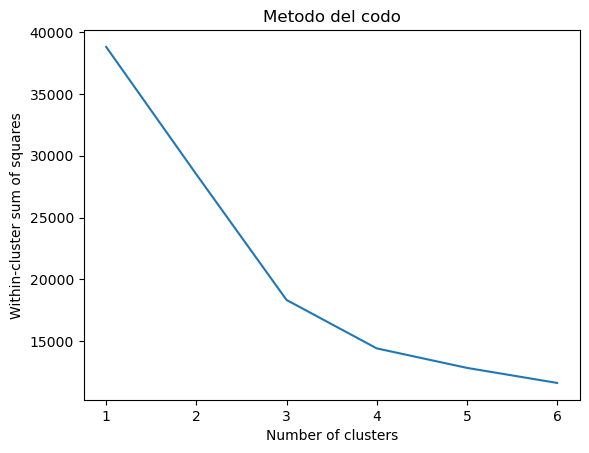

In [83]:
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss1)
plt.title("Metodo del codo")
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')

In [37]:
#para esta combinacion de variables, el numero de clusters son 3
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
x1['cluster'] = kmeans.fit_predict(x1)

#para la visiualización tomamos los componentes principales
# n_componentes = 2
pca = PCA(n_components=2)
data_pca = pca.fit_transform(x1.drop('cluster', axis=1))

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


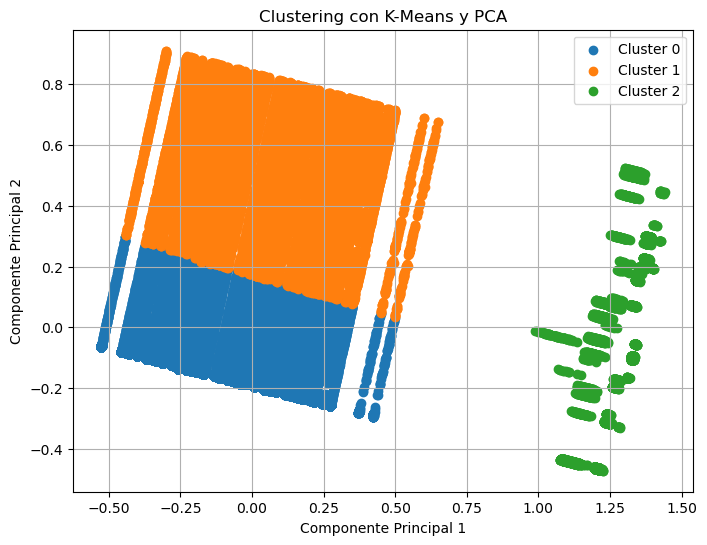

In [40]:
plt.figure(figsize=(8, 6))

for cluster_num in range(n_clusters):
    plt.scatter(
        data_pca[x1['cluster'] == cluster_num, 0],
        data_pca[x1['cluster'] == cluster_num, 1],
        label=f'Cluster {cluster_num}'
    )

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering con K-Means y PCA')
plt.legend()
plt.grid(True)
plt.show()

* analisis clusters 

In [41]:
x2 = data_mapped[['saldo_deuda', 'tasa_cartera_efectiva', 'tasa_operacion_especifica_efectiva',
           'tasa_hipotecario_efectiva', 'tasa_leasing_efectiva', 'tasa_sufi_efectiva',
           'tasa_factoring_efectiva', 'tasa_tarjeta_efectiva']]
x2

,saldo_deuda,tasa_cartera_efectiva,tasa_operacion_especifica_efectiva,tasa_hipotecario_efectiva,tasa_leasing_efectiva,tasa_sufi_efectiva,tasa_factoring_efectiva,tasa_tarjeta_efectiva
0,1050000,5.005688,5.265622,2.009687,1.847447,1.769252,4.425288,49.558035
1,1050000,5.196311,5.686713,2.977988,2.457905,1.778485,4.033420,49.558035
2,1050000,5.267613,6.047543,5.506595,2.667715,1.309219,3.580820,49.558035
3,1050000,5.420850,5.583757,3.118667,2.185660,1.796389,4.922723,49.558035
4,1050000,5.663202,6.278165,2.302463,2.824273,1.502324,5.033331,49.558035
...,...,...,...,...,...,...,...,...
128363,9228,20.215793,16.103715,1.811426,3.797280,5.348491,3.406664,49.558035
128364,9228,25.555139,6.945155,5.080820,2.439227,2.102328,4.239216,49.558035
128365,9228,25.902755,10.771327,4.978445,2.439227,1.096698,4.239216,49.558035
128366,9228,26.339209,12.616362,5.739134,3.825634,2.944252,3.703196,49.558035


In [42]:
from sklearn.preprocessing import MinMaxScaler

escalador = MinMaxScaler().fit(x2.values)

x2 = pd.DataFrame(escalador.transform(x2.values),
                       columns=['saldo_deuda', 'tasa_cartera_efectiva', 'tasa_operacion_especifica_efectiva',
           'tasa_hipotecario_efectiva', 'tasa_leasing_efectiva', 'tasa_sufi_efectiva',
           'tasa_factoring_efectiva', 'tasa_tarjeta_efectiva'])
x2.head(3)

,saldo_deuda,tasa_cartera_efectiva,tasa_operacion_especifica_efectiva,tasa_hipotecario_efectiva,tasa_leasing_efectiva,tasa_sufi_efectiva,tasa_factoring_efectiva,tasa_tarjeta_efectiva
0,0.075806,0.148729,0.317664,0.106418,0.331677,0.249098,0.308209,1.0
1,0.075806,0.154534,0.343687,0.159623,0.446401,0.250421,0.280173,1.0
2,0.075806,0.156706,0.365987,0.298564,0.485831,0.183212,0.247791,1.0


In [43]:
x2["saldo_deuda"].unique()

array([0.07580571, 0.00543549, 0.0016844 , ..., 0.00026337, 0.00638782,
       0.00066622])

In [44]:
#wss
wcss1 = list()
for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x2)
    wcss1.append(kmeans.inertia_)
wcss1

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

[27493.92962012424,
 16428.58144898278,
 11294.883404652675,
 9290.130621971144,
 7695.3974445262,
 6647.119718397297]

Text(0, 0.5, 'Within-cluster sum of squares')

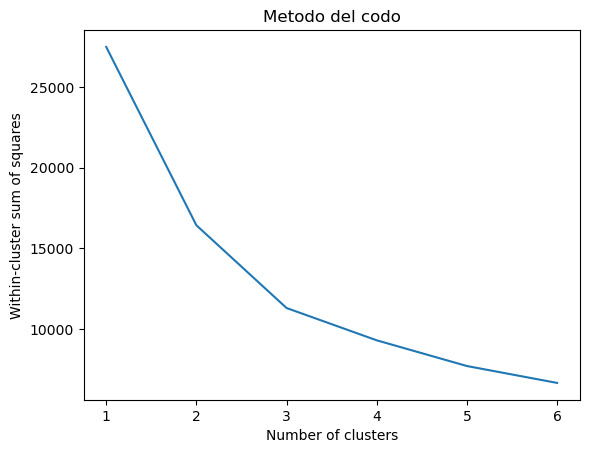

In [45]:
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss1)
plt.title("Metodo del codo")
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')

In [46]:
#para esta combinacion de variables, el numero de clusters son 2
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
x2['cluster'] = kmeans.fit_predict(x2)

#para la visiualización tomamos los componentes principales
# n_componentes = 2

pca = PCA(n_components=2)
data_pca = pca.fit_transform(x1.drop('cluster', axis=1))

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


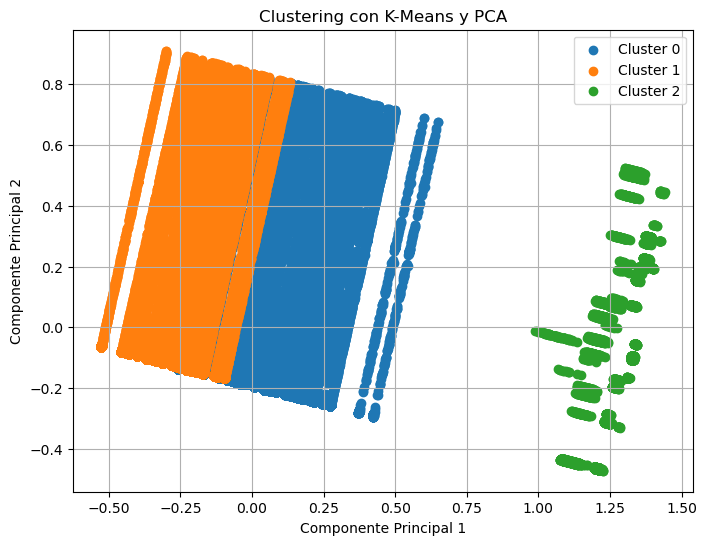

In [47]:
plt.figure(figsize=(8, 6))

for cluster_num in range(n_clusters):
    plt.scatter(
        data_pca[x2['cluster'] == cluster_num, 0],
        data_pca[x2['cluster'] == cluster_num, 1],
        label=f'Cluster {cluster_num}'
    )

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering con K-Means y PCA')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
data_mapped.columns

Index(['radicado', 'num_documento', 'cod_segm_tasa', 'cod_subsegm_tasa',
       'cal_interna_tasa', 'id_producto', 'tipo_id_producto', 'valor_inicial',
       'fecha_desembolso', 'plazo', 'cod_periodicidad', 'periodicidad',
       'saldo_deuda', 'modalidad', 'tipo_plazo', 'cod_segmento',
       'tasa_cartera', 'tasa_operacion_especifica', 'tasa_hipotecario',
       'tasa_leasing', 'tasa_sufi', 'tasa_factoring', 'tasa_tarjeta',
       'tasa_cartera_efectiva', 'tasa_operacion_especifica_efectiva',
       'tasa_hipotecario_efectiva', 'tasa_leasing_efectiva',
       'tasa_sufi_efectiva', 'tasa_factoring_efectiva',
       'tasa_tarjeta_efectiva', 'valor_final',
       'monto_total_deuda_por_segmento'],
      dtype='object')

In [49]:
data_mapped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127969 entries, 0 to 128367
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   radicado                            127969 non-null  int64  
 1   num_documento                       127969 non-null  int64  
 2   cod_segm_tasa                       127969 non-null  int64  
 3   cod_subsegm_tasa                    127969 non-null  int64  
 4   cal_interna_tasa                    127969 non-null  int32  
 5   id_producto                         127969 non-null  int32  
 6   tipo_id_producto                    127969 non-null  object 
 7   valor_inicial                       127969 non-null  float64
 8   fecha_desembolso                    127969 non-null  object 
 9   plazo                               127969 non-null  float64
 10  cod_periodicidad                    127969 non-null  int64  
 11  periodicidad              

In [50]:
data_mapped.to_excel('lol.xlsx')

# REGRESIÓN

* Construya un modelo de regresión para predecir el saldo de la deuda del cliente en 
función de las otras características

In [101]:
X = data_mapped[['cod_segmento', 'cal_interna_tasa',
       'id_producto', 'valor_inicial', 'plazo', 'cod_periodicidad',
       'modalidad', 'tipo_plazo', 'tasa_cartera_efectiva',
       'tasa_operacion_especifica_efectiva', 'tasa_hipotecario_efectiva',
       'tasa_leasing_efectiva', 'tasa_sufi_efectiva',
       'tasa_factoring_efectiva', 'tasa_tarjeta_efectiva', 'valor_final',
       'monto_total_deuda_por_segmento']]

y = data_mapped[['saldo_deuda']]

In [102]:
y.describe()

,saldo_deuda
count,1.279690e+05
mean,2.207735e+05
std,5.709615e+05
min,0.000000e+00
25%,2.040600e+04
50%,6.842400e+04
75%,2.074640e+05
max,1.385120e+07


In [103]:
from sklearn.preprocessing import MinMaxScaler

escalador = MinMaxScaler().fit(X.values)

X = pd.DataFrame(escalador.transform(X.values),
                       columns=['cod_segmento', 'cal_interna_tasa',
       'id_producto', 'valor_inicial', 'plazo', 'cod_periodicidad',
       'modalidad', 'tipo_plazo', 'tasa_cartera_efectiva',
       'tasa_operacion_especifica_efectiva', 'tasa_hipotecario_efectiva',
       'tasa_leasing_efectiva', 'tasa_sufi_efectiva',
       'tasa_factoring_efectiva', 'tasa_tarjeta_efectiva', 'valor_final',
       'monto_total_deuda_por_segmento'])
X.head()

,cod_segmento,cal_interna_tasa,id_producto,valor_inicial,plazo,cod_periodicidad,modalidad,tipo_plazo,tasa_cartera_efectiva,tasa_operacion_especifica_efectiva,tasa_hipotecario_efectiva,tasa_leasing_efectiva,tasa_sufi_efectiva,tasa_factoring_efectiva,tasa_tarjeta_efectiva,valor_final,monto_total_deuda_por_segmento
0,0.428571,0.48,0.992298,0.075267,0.00015,0.0,0.0,1.0,0.148729,0.317664,0.106418,0.331677,0.249098,0.308209,1.0,0.030807,1.0
1,0.428571,0.48,0.992298,0.075267,0.00015,0.0,0.0,1.0,0.154534,0.343687,0.159623,0.446401,0.250421,0.280173,1.0,0.030807,1.0
2,0.428571,0.48,0.992298,0.075267,0.00015,0.0,0.0,1.0,0.156706,0.365987,0.298564,0.485831,0.183212,0.247791,1.0,0.030807,1.0
3,0.428571,0.48,0.992298,0.075267,0.00015,0.0,0.0,1.0,0.161372,0.337325,0.167353,0.395238,0.252985,0.343799,1.0,0.030807,1.0
4,0.428571,0.48,0.992298,0.075267,0.00015,0.0,0.0,1.0,0.168753,0.380239,0.122505,0.515254,0.210868,0.351713,1.0,0.030807,1.0


In [104]:
X["monto_total_deuda_por_segmento"].unique()

array([1.        , 0.05996862, 0.        ])

In [105]:
from sklearn.linear_model import Ridge

In [106]:
clf = Ridge(alpha=1.0)

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [108]:
# Se define conjunto de train en 80% y test 20%, 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state = 42)

In [109]:
clf.fit(X_train, y_train)

Ridge()

In [110]:
r_sq = clf.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7496251020435792


In [111]:
print(f"intercept: {clf.intercept_}")
intercept: 5.633333333333329

print(f"slope: {clf.coef_}")

intercept: [184890.41514615]
slope: [[-6.12426148e+04 -6.76025908e+04 -1.54676407e+04  9.55610391e+06
  -2.39495444e+04  8.63850095e+04 -1.08983191e+05  2.68612466e+04
   3.79647717e+03 -2.21695227e+03  4.05659790e+03 -7.11108855e+03
   7.04018764e+03 -3.66134318e+03 -2.51815074e+04 -1.20478864e+05
  -1.74615480e+04]]


Cada coeficiente representa el cambio en el log-odds de que el evento ocurra para una unidad de cambio en el predictor correspondiente

*  MAE: Es el promedio de la diferencia absoluta entre el valor observado y los valores predichos. El error absoluto medio o MAE es un puntaje lineal, lo que significa que todas las diferencias individuales se ponderán por igual en el promedio

In [112]:
y_prediction = clf.predict(X_train)
print("MAE on train data = " , metrics.mean_absolute_error(y_train, y_prediction))
# Evaluating the trained model on test data
y_prediction = clf.predict(X_test)
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_prediction))

MAE on train data =  94343.93725701328
MAE on test data =  94924.14481664488


# VALIDACION CRUZADA

* Realice una validación cruzada del modelo para asegurarse de su robustez

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [114]:
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [115]:
scores_reg1 = cross_val_score(clf, X_train, y_train, cv=3, scoring="r2") 
scores_reg1

array([0.71300843, 0.78074189, 0.7698512 ])

In [116]:
scores_reg2 = cross_val_score(clf, X_test, y_test, cv=3, scoring="r2") 
scores_reg2

array([0.75853318, 0.71467957, 0.62316201])

In [117]:
predict_reg1 = cross_val_predict(clf, X_train, y_train
                                    ,cv=3)
predict_reg1

array([[315439.7693523 ],
       [ 87174.50842114],
       [131285.7229353 ],
       ...,
       [347247.64552858],
       [ -7927.3855231 ],
       [140076.75645059]])

In [68]:
predict_reg2 = cross_val_predict(clf, X_test, y_test
                                    ,cv=3)
predict_reg2

array([[ 98178.71210289],
       [304321.22236011],
       [-15229.4130874 ],
       ...,
       [ 96282.57745452],
       [454887.63255386],
       [139210.9522151 ]])

Metricas conjunto de entrenamiento

In [118]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

In [119]:
mae_result  =  median_absolute_error(y_train, predict_reg1)
r2_result  = r2_score(y_train, predict_reg1)

print("Median Absolute Error:", mae_result )
print("R^2 Score:", r2_result)

Median Absolute Error: 54095.58985651293
R^2 Score: 0.7564582605002024


Metricas test

In [121]:
mae_result  =  median_absolute_error(y_test, predict_reg2)
r2_result  = r2_score(y_test, predict_reg2)

print("Median Absolute Error:", mae_result )
print("R^2 Score:", r2_result)

Median Absolute Error: 58117.93094051913
R^2 Score: 0.7043544904628922


* Probar otro modelo regresion

In [123]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

                                              0.0/101.0 MB ? eta -:--:--
                                              0.1/101.0 MB 2.9 MB/s eta 0:00:35
                                              0.5/101.0 MB 5.3 MB/s eta 0:00:20
                                              1.0/101.0 MB 7.3 MB/s eta 0:00:14
                                              1.6/101.0 MB 9.1 MB/s eta 0:00:11
                                              2.0/101.0 MB 9.3 MB/s eta 0:00:11
                                              2.0/101.0 MB 9.3 MB/s eta 0:00:11
     -                                        3.0/101.0 MB 9.5 MB/s eta 0:00:11
     -                                       3.7/101.0 MB 10.3 MB/s eta 0:00:10
     -                                       4.2/101.0 MB 10.4 MB/s eta 0:00:10
     -                                       4.8/101.0 MB 10.5 


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
import catboost as cb

In [125]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [126]:
model.fit(X_train, y_train)

Learning rate set to 0.085073
0:	learn: 531592.6385726	total: 167ms	remaining: 2m 46s
1:	learn: 493756.0843549	total: 179ms	remaining: 1m 29s
2:	learn: 460272.6020633	total: 191ms	remaining: 1m 3s
3:	learn: 428562.7610521	total: 205ms	remaining: 51s
4:	learn: 399779.3969024	total: 218ms	remaining: 43.3s
5:	learn: 373362.9232761	total: 232ms	remaining: 38.4s
6:	learn: 348748.0891404	total: 245ms	remaining: 34.8s
7:	learn: 326501.2311170	total: 260ms	remaining: 32.2s
8:	learn: 306008.8947208	total: 273ms	remaining: 30s
9:	learn: 286534.8048988	total: 285ms	remaining: 28.2s
10:	learn: 269477.2902031	total: 300ms	remaining: 26.9s
11:	learn: 254329.5499169	total: 312ms	remaining: 25.7s
12:	learn: 239678.7525695	total: 325ms	remaining: 24.7s
13:	learn: 225162.6397379	total: 339ms	remaining: 23.8s
14:	learn: 212696.7394224	total: 355ms	remaining: 23.3s
15:	learn: 201857.1766946	total: 370ms	remaining: 22.7s
16:	learn: 191716.8158515	total: 390ms	remaining: 22.5s
17:	learn: 181459.7120855	tota

In [127]:
y_prediction = model.predict(X_train)
print("MAE on train data = " , metrics.mean_absolute_error(y_train, y_prediction))
# Evaluating the trained model on test data
y_prediction = model.predict(X_test)
print("MAE on test data = " , metrics.mean_absolute_error(y_test, y_prediction))

MAE on train data =  7150.995824322866
MAE on test data =  7538.5430208746775


* Validation

In [128]:
scores_reg1 = cross_val_score(model, X_train, y_train, cv=3, scoring="r2") 
scores_reg1

Learning rate set to 0.079794
0:	learn: 544507.3755096	total: 10.9ms	remaining: 10.9s
1:	learn: 508280.1336195	total: 20.8ms	remaining: 10.4s
2:	learn: 474895.1896688	total: 33.2ms	remaining: 11s
3:	learn: 444174.2011928	total: 41.9ms	remaining: 10.4s
4:	learn: 415828.1674146	total: 52.8ms	remaining: 10.5s
5:	learn: 389639.6948817	total: 64.4ms	remaining: 10.7s
6:	learn: 366270.6878202	total: 75.5ms	remaining: 10.7s
7:	learn: 344423.2411464	total: 85.6ms	remaining: 10.6s
8:	learn: 323638.2605481	total: 96.6ms	remaining: 10.6s
9:	learn: 305322.7768159	total: 107ms	remaining: 10.6s
10:	learn: 287840.2006502	total: 120ms	remaining: 10.8s
11:	learn: 271903.1628114	total: 133ms	remaining: 10.9s
12:	learn: 257294.5967847	total: 145ms	remaining: 11s
13:	learn: 243293.7473339	total: 154ms	remaining: 10.9s
14:	learn: 230756.0602413	total: 168ms	remaining: 11s
15:	learn: 218714.5333648	total: 180ms	remaining: 11s
16:	learn: 207985.9770417	total: 189ms	remaining: 10.9s
17:	learn: 198370.5250629	t

array([0.99936951, 0.99942595, 0.99939929])

In [129]:
scores_reg2 = cross_val_score(model, X_test, y_test, cv=3, scoring="r2") 
scores_reg2



Learning rate set to 0.064097
0:	learn: 510811.2826218	total: 6.38ms	remaining: 6.37s
1:	learn: 486958.6899135	total: 11ms	remaining: 5.51s
2:	learn: 463758.6961376	total: 17.2ms	remaining: 5.7s
3:	learn: 442428.1287636	total: 21.7ms	remaining: 5.39s
4:	learn: 421625.6460794	total: 26.2ms	remaining: 5.21s
5:	learn: 403834.8031170	total: 28.9ms	remaining: 4.79s
6:	learn: 386461.4152922	total: 34.1ms	remaining: 4.83s
7:	learn: 369311.9320248	total: 38.7ms	remaining: 4.8s
8:	learn: 353228.7057973	total: 43.3ms	remaining: 4.77s
9:	learn: 338216.7130003	total: 50.1ms	remaining: 4.96s
10:	learn: 324441.6122312	total: 55.7ms	remaining: 5s
11:	learn: 310885.1601830	total: 60.4ms	remaining: 4.97s
12:	learn: 299262.9983819	total: 65.6ms	remaining: 4.98s
13:	learn: 287976.6651526	total: 69.9ms	remaining: 4.92s
14:	learn: 278013.8206108	total: 74.6ms	remaining: 4.9s
15:	learn: 268564.4054357	total: 78.9ms	remaining: 4.85s
16:	learn: 258843.3713542	total: 83.9ms	remaining: 4.85s
17:	learn: 250457.1

array([0.99249974, 0.9943704 , 0.99729406])

In [130]:
predict_reg1 = cross_val_predict(model, X_train, y_train
                                    ,cv=3)
predict_reg1


Learning rate set to 0.079794
0:	learn: 544507.3755096	total: 11.7ms	remaining: 11.7s
1:	learn: 508280.1336195	total: 22.2ms	remaining: 11.1s
2:	learn: 474895.1896688	total: 32.5ms	remaining: 10.8s
3:	learn: 444174.2011928	total: 43.1ms	remaining: 10.7s
4:	learn: 415828.1674146	total: 53.9ms	remaining: 10.7s
5:	learn: 389639.6948817	total: 63.8ms	remaining: 10.6s
6:	learn: 366270.6878202	total: 76.4ms	remaining: 10.8s
7:	learn: 344423.2411464	total: 86.5ms	remaining: 10.7s
8:	learn: 323638.2605481	total: 98.5ms	remaining: 10.8s
9:	learn: 305322.7768159	total: 110ms	remaining: 10.9s
10:	learn: 287840.2006502	total: 124ms	remaining: 11.2s
11:	learn: 271903.1628114	total: 135ms	remaining: 11.1s
12:	learn: 257294.5967847	total: 146ms	remaining: 11.1s
13:	learn: 243293.7473339	total: 158ms	remaining: 11.1s
14:	learn: 230756.0602413	total: 168ms	remaining: 11s
15:	learn: 218714.5333648	total: 180ms	remaining: 11.1s
16:	learn: 207985.9770417	total: 193ms	remaining: 11.2s
17:	learn: 198370.525

array([371364.79260498,  14424.21157578,  91504.03026115, ...,
       320962.04013554,  49630.29048026,  58301.24243391])

In [131]:
predict_reg2 = cross_val_predict(model, X_test, y_test
                                    ,cv=3)
predict_reg2

Learning rate set to 0.064097
0:	learn: 510811.2826218	total: 6.96ms	remaining: 6.95s
1:	learn: 486958.6899135	total: 12.9ms	remaining: 6.43s
2:	learn: 463758.6961376	total: 17.8ms	remaining: 5.91s
3:	learn: 442428.1287636	total: 24.2ms	remaining: 6.04s
4:	learn: 421625.6460794	total: 29.4ms	remaining: 5.85s
5:	learn: 403834.8031170	total: 33.5ms	remaining: 5.54s
6:	learn: 386461.4152922	total: 39.2ms	remaining: 5.56s
7:	learn: 369311.9320248	total: 44.2ms	remaining: 5.48s
8:	learn: 353228.7057973	total: 49.8ms	remaining: 5.48s
9:	learn: 338216.7130003	total: 55.7ms	remaining: 5.51s
10:	learn: 324441.6122312	total: 60.8ms	remaining: 5.46s
11:	learn: 310885.1601830	total: 66.1ms	remaining: 5.44s
12:	learn: 299262.9983819	total: 72.6ms	remaining: 5.51s
13:	learn: 287976.6651526	total: 77.9ms	remaining: 5.49s
14:	learn: 278013.8206108	total: 83.6ms	remaining: 5.49s
15:	learn: 268564.4054357	total: 89.2ms	remaining: 5.49s
16:	learn: 258843.3713542	total: 95.6ms	remaining: 5.53s
17:	learn: 

array([ 15029.91124391, 371048.2657046 ,  11210.60086042, ...,
        41483.64478113, 610493.02824242,  61144.21903105])

In [133]:
mae_result  =  median_absolute_error(y_train, predict_reg1)
r2_result  = r2_score(y_train, predict_reg1)

print("Median Absolute Error:", mae_result )
print("R^2 Score:", r2_result)



Median Absolute Error: 4343.877951400471
R^2 Score: 0.999399986859369


In [134]:
mae_result  =  median_absolute_error(y_test, predict_reg2)
r2_result  = r2_score(y_test, predict_reg2)

print("Median Absolute Error:", mae_result )
print("R^2 Score:", r2_result)

Median Absolute Error: 5979.141066276614
R^2 Score: 0.9945160029360913


Un R^2 Score de 0.9945160029360913 es un valor muy cercano a 1, lo cual indica que el modelo de regresión explica una gran cantidad de la variabilidad de los datos. En términos generales, un R^2 Score cercano a 1 es un indicativo de que el modelo tiene un buen ajuste a los datos y puede hacer predicciones precisas.

# ejericios python

*Realizar un programa que lea una secuencia de números por teclado. La secuencia 
finaliza al digitar el valor de -1. Para la secuencia leída el algoritmo debe calcular el 
promedio de los valores mayores al promedio de la secuencia*

In [251]:
#se crea una lista donde se almacena la secuencia de numeros ingresados 
numeros = []

#Se finaliza solo cuando se ponga en valor -1 
while True:
    numero = int(input("Ingrese una secuencia de números: "))
    if numero == -1:
        break
    numeros.append(numero) #añadir cada numero

#se calcula el promedio de la secuencia 
promedio_i = sum(numeros)/len(numeros)

#may_promedio = [numero for numero in numeros if numero > promedio_i]
may_promedio = []
for numero in numeros:
    if numero > promedio_i:
        may_promedio.append(numero)
        
prom_numeros_mayor = sum(may_promedio) / len(may_promedio)

print("El promedio de los números mayores al promedio es:", prom_numeros_mayor)

El promedio de los números mayores al promedio es: 3.0


Realizar una función, que reciba como parámetros una lista (vector o array) 
ordenada y un número x. 

La función debe imprimir por pantalla el par de números, cuya 
suma es más cercana al valor de x

In [276]:
#argumnetos de la funcion lista - numero 

def sum_cercana(lista, x):
  # variables donde vamos a almacenar los valores 
  diferencia = 10**9 #un valor muy grande 
  par_mas_cercano = None

  # Itera por la lista, para las combinaciones posibles de la lista de numeros 
  for i in range(len(lista)):
    for j in range(i + 1, len(lista)):
      # sumamos los elemntos de la lista y rstamos el numero, para conocer la diferencia
      dif_abs = abs(lista[i] + lista[j] - x)

      # Si la diferencia absoluta es menor a la diferencia absoluta mínima, actualiza el par más cercano.
      if dif_abs < diferencia:
        diferencia = dif_abs
        par_mas_cercano = (lista[i], lista[j])

  return par_mas_cercano


In [278]:
lista = [10, 22, 28, 29, 30, 40]
x = 54

num = sum_cercana(lista, x)
num

(22, 30)